In [112]:
# objective
# 환경오염 데이터를 이용한 도시들의 패턴 식별
# target
# 환경 정책 수립자-환경오염에 대한 대응책을 수립하는 정책 수립자, 일반 시민-환경오염에 대한 관심이 많은 일반 시민

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
# df = pd.read_csv('./data/south-korean-pollution-data.csv')
df = pd.read_csv('./data/pollution_data.csv', encoding='utf-8')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

########## Simple Data Exploration 1 ##########
# Set pandas options to display all rows and columns
print("=========Dtype of all columns=========")
print(df.dtypes)

print("=========Involving Nan=========")
print(df.isna().sum())

print("========= Statistical Description =========") 
print(df.describe())


=========Dtype of all columns=========
Unnamed: 0      int64
Country        object
District       object
City           object
date          float64
pm25           object
pm10           object
so2            object
o3             object
no2            object
co             object
dtype: object
=========Involving Nan=========
Unnamed: 0     0
Country        0
District       0
City           0
date           0
pm25          95
pm10          95
so2            0
o3            95
no2           95
co            95
dtype: int64
========= Statistical Description =========
         Unnamed: 0          date
count  15485.000000  15485.000000
mean    7742.000000   2018.527579
std     4470.278794      2.274284
min        0.000000   2015.010000
25%     3871.000000   2016.120000
50%     7742.000000   2018.120000
75%    11613.000000   2020.120000
max    15484.000000   2022.110000


In [113]:
########## Simple Data Exploration 2: 각 도시별 오염지수 평균 출력 ##########
# Everything here is before scaling
print("\n========= Mean values of pollutants for each city =========")
# Set pandas options to display all rows and columns

pollutants = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']

# drop nan values and string values
df = df.dropna()
df = df.drop(df[df['pm25'] == '-'].index, axis=0)
df = df.drop(df[df['pm10'] == '-'].index, axis=0)
df = df.drop(df[df['o3'] == '-'].index, axis=0)
df = df.drop(df[df['no2'] == '-'].index, axis=0)
df = df.drop(df[df['so2'] == '-'].index, axis=0)
df = df.drop(df[df['co'] == '-'].index, axis=0)

# convert num* to num and num** to num
df['pm25'] = df['pm25'].str.replace("*", "")
df['pm25'] = df['pm25'].str.replace("**", "")
df['pm10'] = df['pm10'].str.replace("*", "")
df['pm10'] = df['pm10'].str.replace("**", "")
df['o3'] = df['o3'].str.replace("*", "")
df['o3'] = df['o3'].str.replace("**", "")
df['no2'] = df['no2'].str.replace("*", "")
df['no2'] = df['no2'].str.replace("**", "")
df['so2'] = df['so2'].str.replace("*", "")
df['so2'] = df['so2'].str.replace("**", "")
df['co'] = df['co'].str.replace("*", "")
df['co'] = df['co'].str.replace("**", "")


# convert the pollutants columns to float
df[pollutants] = df[pollutants].astype(float)

# Before Scaling, compute the mean of poollutants for each city
city_pollutants_mean = df.groupby('City')[pollutants].mean()
print(city_pollutants_mean)

# 각 오염 물질에 대해 도시를 내림차순으로 정렬
city_ranking = {}
for pollutant in pollutants:
    city_ranking[pollutant] = city_pollutants_mean[pollutant].sort_values(ascending=False).index

city_ranking_df = pd.DataFrame(city_ranking)

print("\n========= Ranking of cities for each pollutant =========")
print(city_ranking_df)


========= Mean values of pollutants for each city =========
              pm25       pm10        o3       no2       so2        co
City                                                                 
가평       19.000000  34.239437  0.027662  0.010930  0.002901  0.426761
강릉       18.645161  37.516129  0.033720  0.012086  0.002892  0.386022
강진       15.268293  26.170732  0.037976  0.006439  0.002707  0.302439
거제       19.234043  35.063830  0.036681  0.013894  0.003904  0.460638
거창       17.636364  32.090909  0.032227  0.012114  0.002227  0.390909
경산       21.865672  37.731343  0.029970  0.009701  0.003627  0.447761
경주       17.867925  30.811321  0.030377  0.012547  0.003642  0.315094
계룡       17.964286  34.660714  0.031696  0.013929  0.003018  0.460714
고령       16.421053  30.552632  0.032132  0.006895  0.003211  0.455263
고성       14.336842  28.431579  0.034947  0.008116  0.002389  0.395789
고양       22.695652  42.637681  0.028710  0.019696  0.003594  0.437681
고창       21.425000  37.425000

In [114]:
########## Simple Data Exploration 2: 각 '도(행정구역)'별 오염지수 평균 출력 ##########
print("\n========= Mean values of pollutants for each district =========")

# Before Scaling, compute the mean of poollutants for each 행정구역
district_pollutants_mean = df.groupby('District')[pollutants].mean()
print(district_pollutants_mean)

# 각 오염 물질에 대해 행정구역 내림차순으로 정렬
district_ranking = {}
for pollutant in pollutants:
    district_ranking[pollutant] = district_pollutants_mean[pollutant].sort_values(ascending=False).index

district_ranking_df = pd.DataFrame(district_ranking)

print("\n========= Ranking of cities for each pollutant =========")
print(district_ranking_df)


========= Mean values of pollutants for each district =========
               pm25       pm10        o3       no2       so2        co
District                                                              
강원도       18.078748  33.172676  0.031122  0.010818  0.002527  0.429222
경기도       23.410182  43.186672  0.027267  0.021500  0.003442  0.467012
경상남도      17.953125  33.804688  0.033341  0.013826  0.003438  0.407986
경상북도      18.290812  33.279215  0.032814  0.010554  0.003270  0.397324
광주광역시     21.757895  37.042105  0.030263  0.016600  0.002758  0.456842
대구광역시     21.463158  38.631579  0.028274  0.018495  0.002716  0.414737
대전광역시     20.831579  39.842105  0.027737  0.018200  0.002884  0.443158
부산광역시     21.284211  37.505263  0.030800  0.018326  0.004537  0.364211
서울특별시     22.589474  40.642105  0.025674  0.027147  0.004116  0.500000
세종특별자치시   21.139241  40.303797  0.029570  0.018000  0.003165  0.505063
울산광역시     20.547368  37.168421  0.030516  0.019779  0.005179  0.488421
인천광역시     22

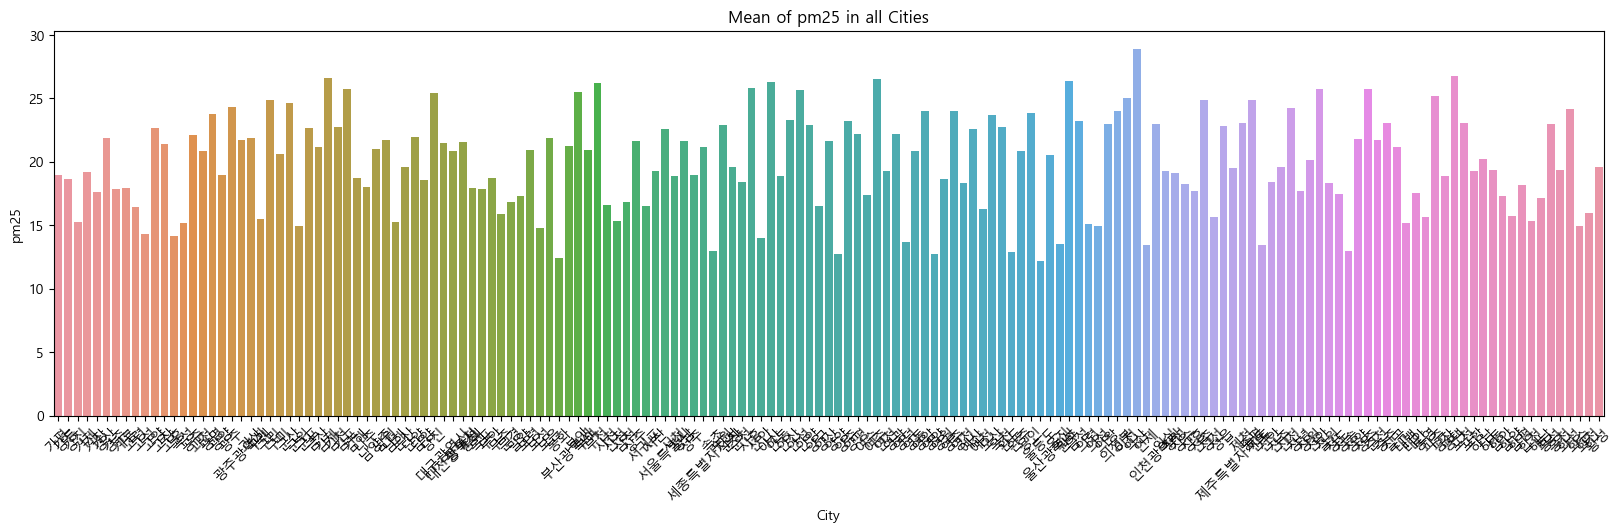

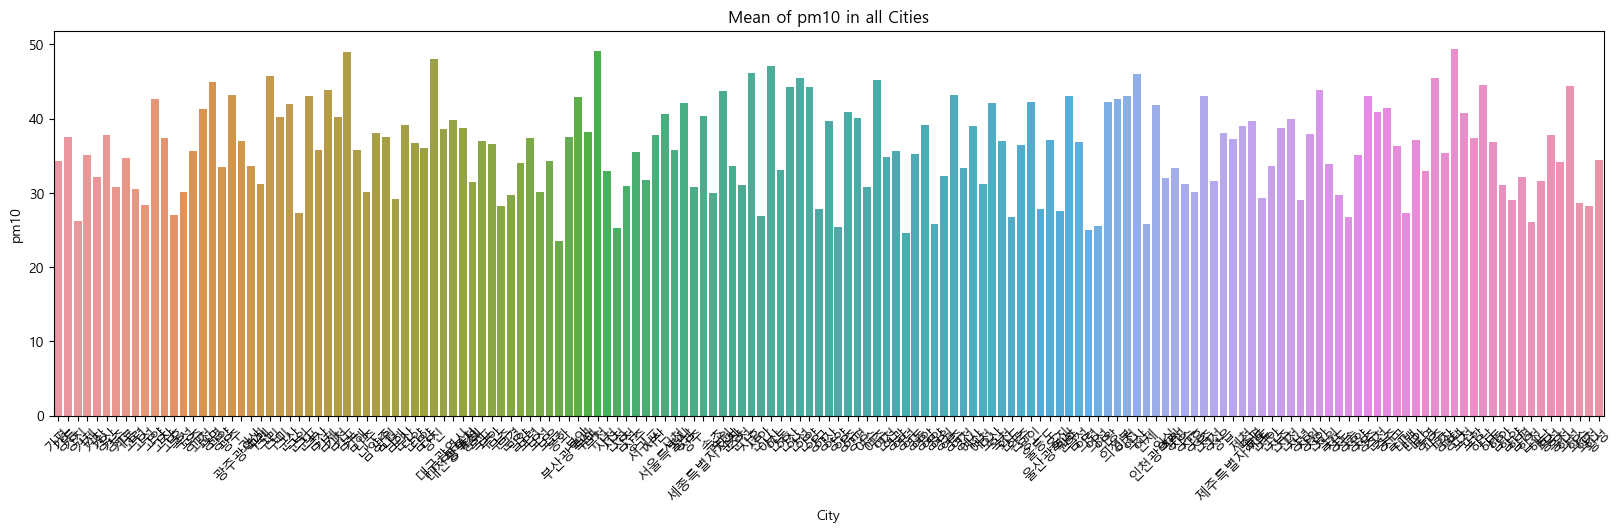

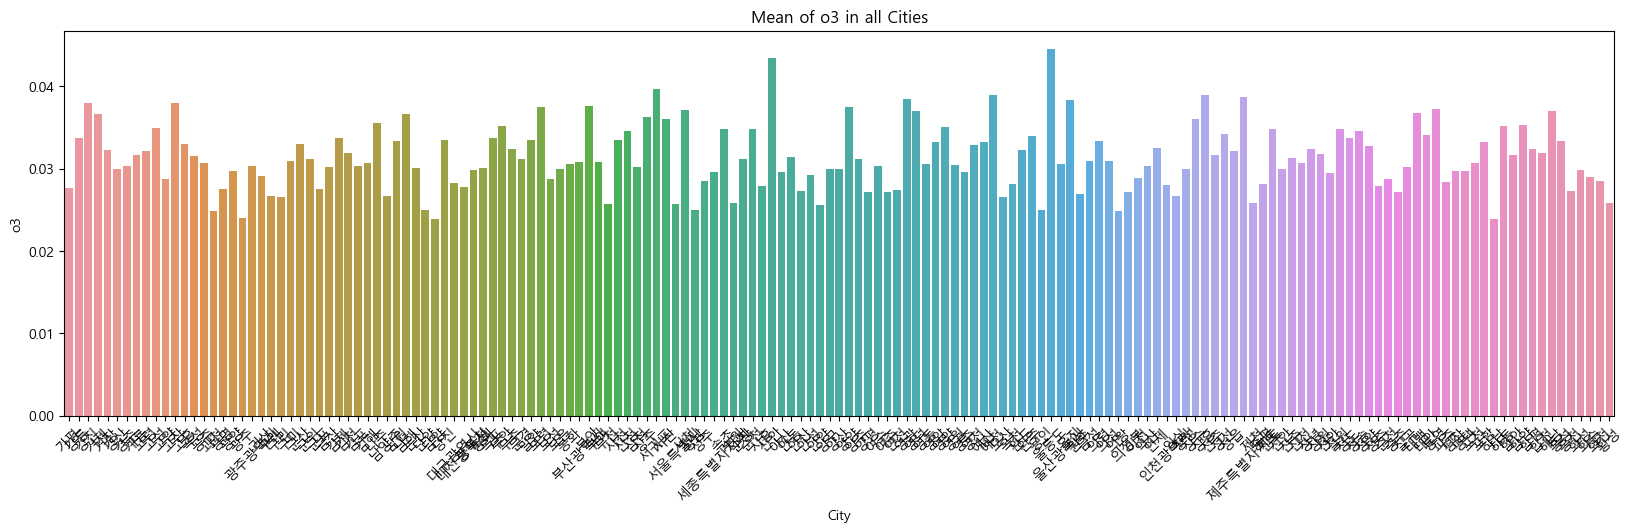

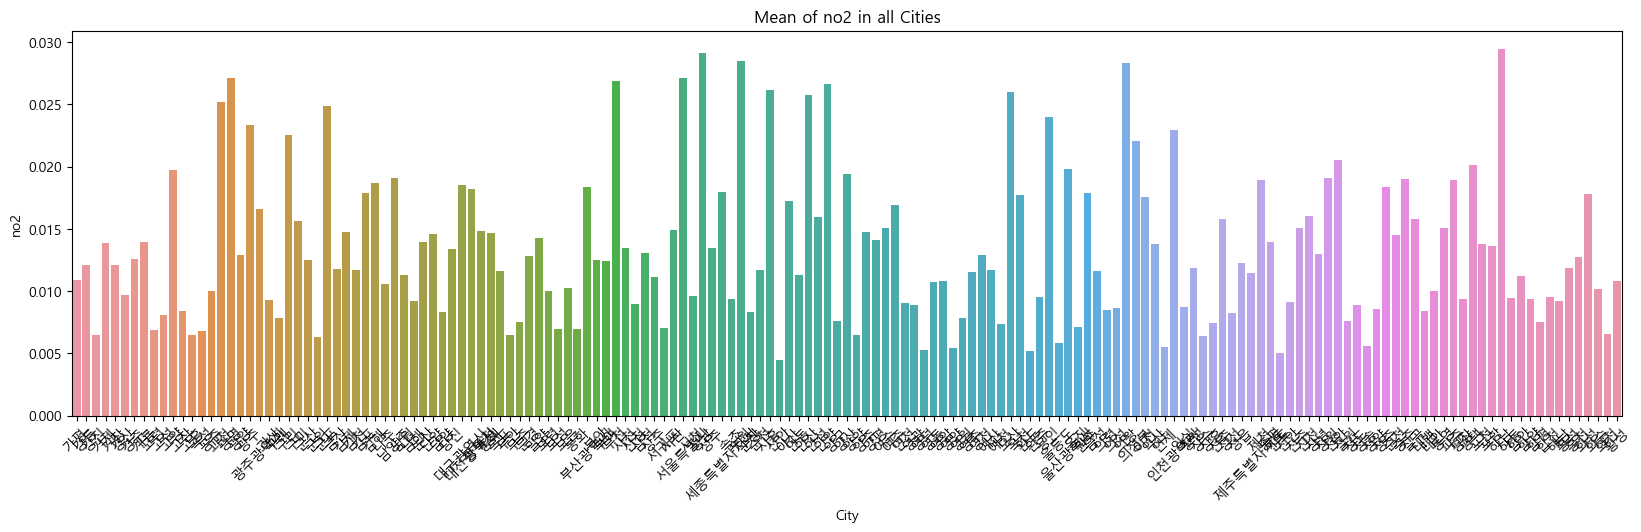

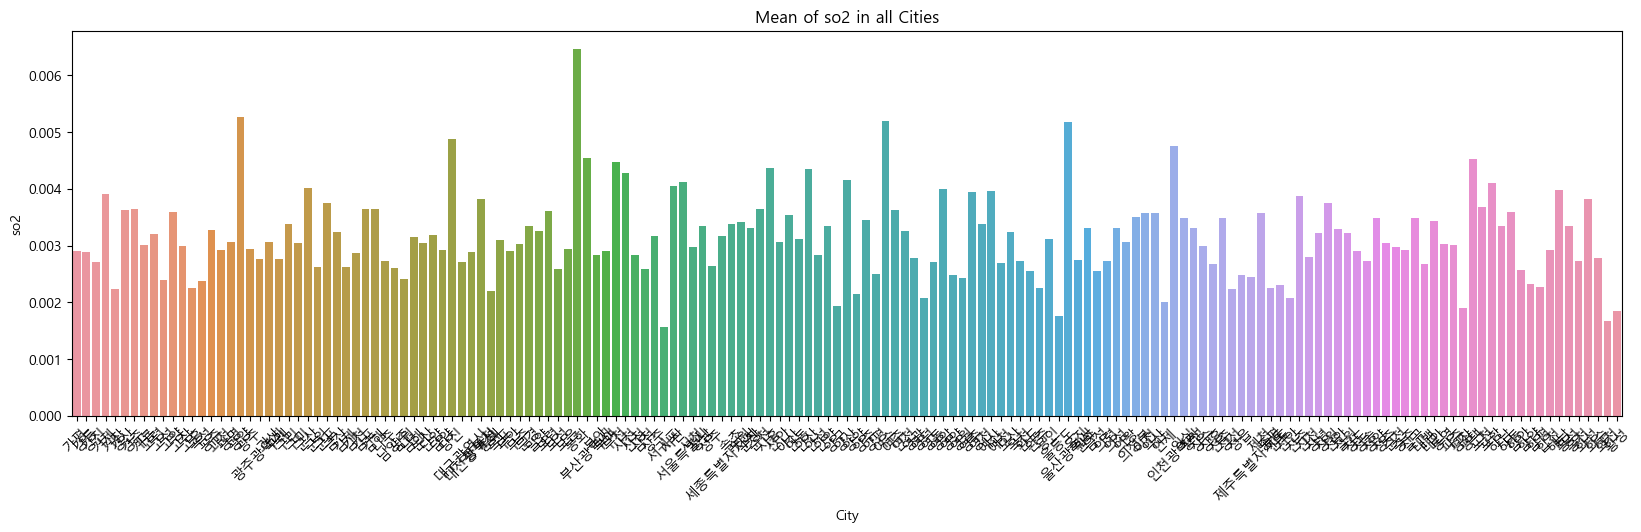

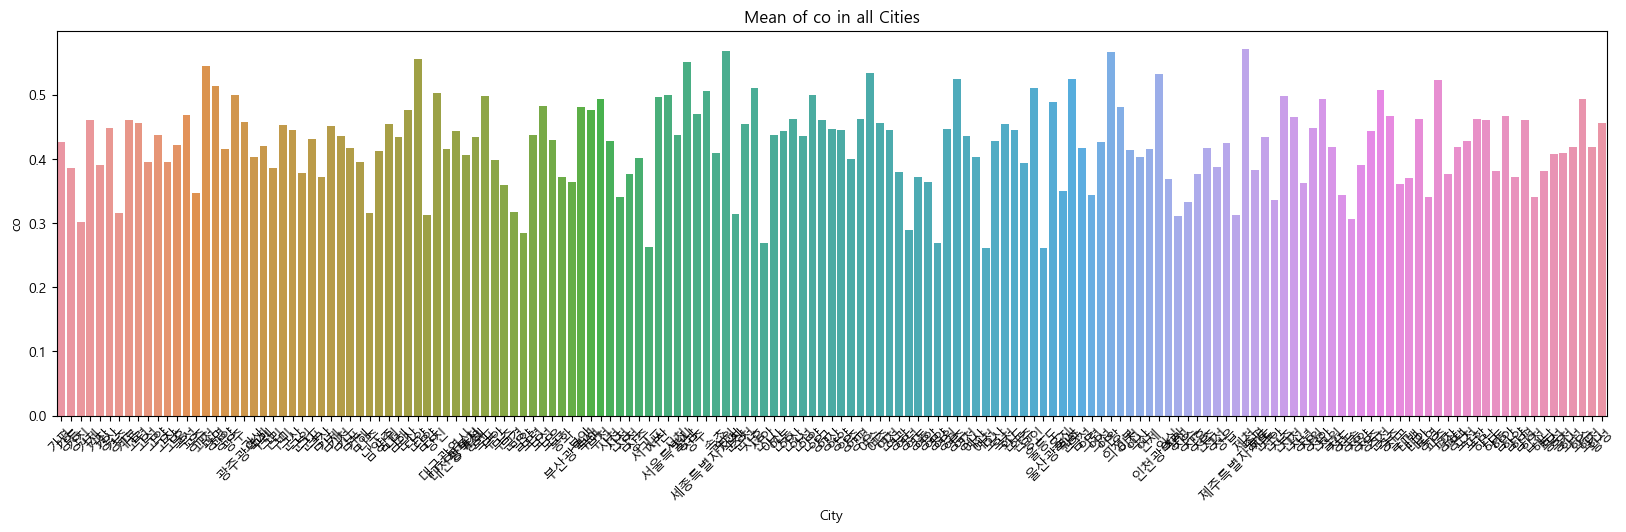


========= Variance of pollutants =========
========= (Higher variance means more spread out data) =========
pm25     71.602824
pm10    193.860051
o3        0.000108
no2       0.000063
so2       0.000002
co        0.017133
dtype: float64


In [115]:
########## Simple Data Exploration 3: Plots-1 ##########
# 각 도시의 오염 물질별 평균 구하기
for pollutant in pollutants:
    plt.figure(figsize=(20, 5))
    sns.barplot(x=city_pollutants_mean.index, y=pollutant, data=city_pollutants_mean)
    plt.title(f'Mean of {pollutant} in all Cities')
    plt.xticks(rotation=45)
    plt.show()

# calculcate variance of each pollutant
print("\n========= Variance of pollutants ========="
        "\n========= (Higher variance means more spread out data) =========")
print(df[pollutants].var())




C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


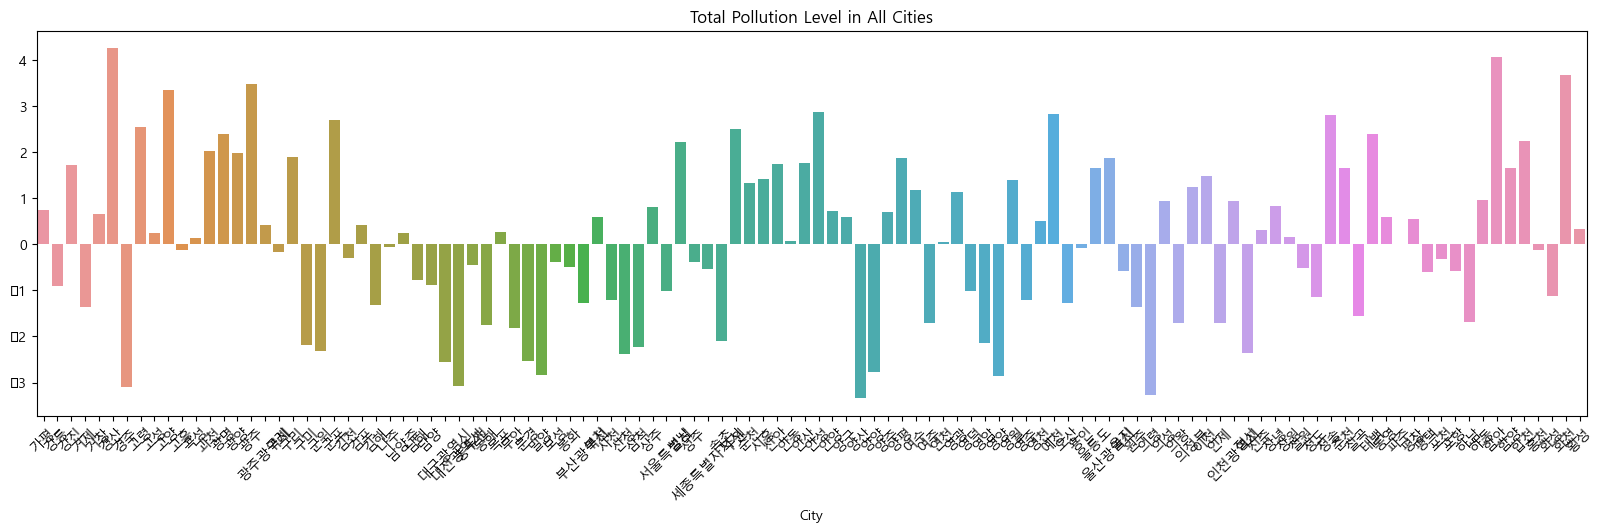

In [116]:
########## Simple Data Exploration 3: Plot-2 ##########
# Scaling with minmax
# scaler = MinMaxScaler()
# df[pollutants] = scaler.fit_transform(df[pollutants])

from sklearn.preprocessing import StandardScaler
# Scaling with standard scaler

scaler = StandardScaler()
# df[pollutants] = scaler.fit_transform(df[pollutants])
# Standardize the data
data_std = scaler.fit_transform(df[pollutants])
data_std = pd.DataFrame(data_std, columns=pollutants)
data_std['City'] = df['City']
data_std['District'] = df['District']

# 각 도시의 오염 물질의 스케일링된 값 합산 후 평균 구하기
city_total_means = data_std.groupby('City')[pollutants].mean().sum(axis=1)
# plot 2
plt.figure(figsize=(20, 5))
sns.barplot(x=city_total_means.index, y=city_total_means.values)
plt.title('Total Pollution Level in All Cities')
plt.xticks(rotation=45)
plt.show()

C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


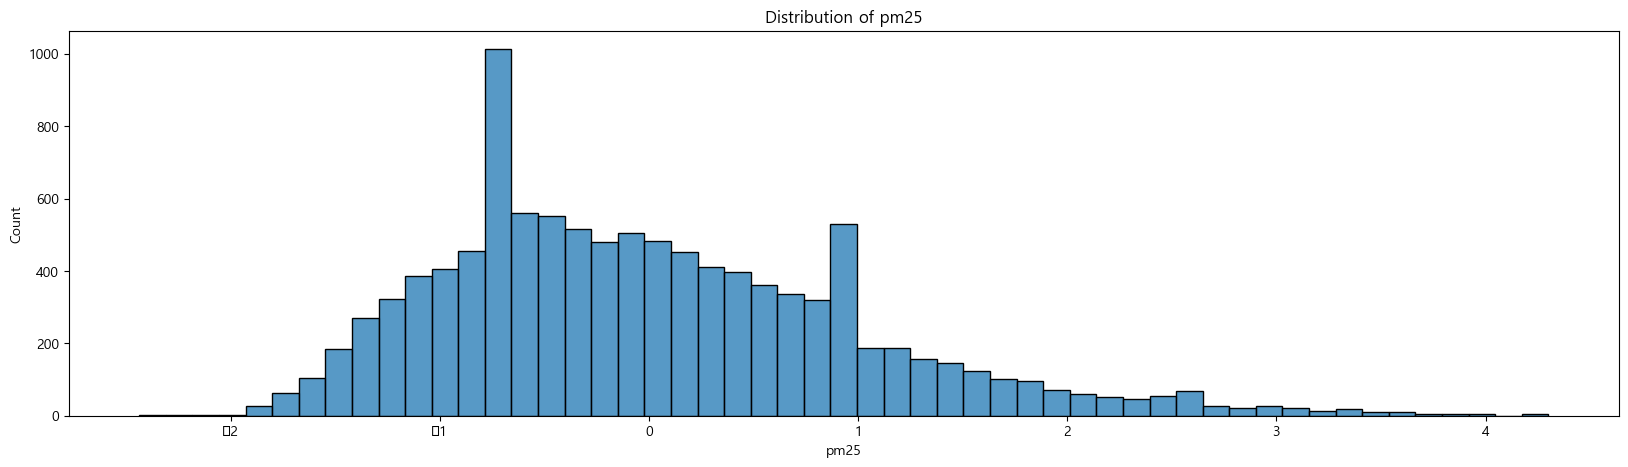

C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


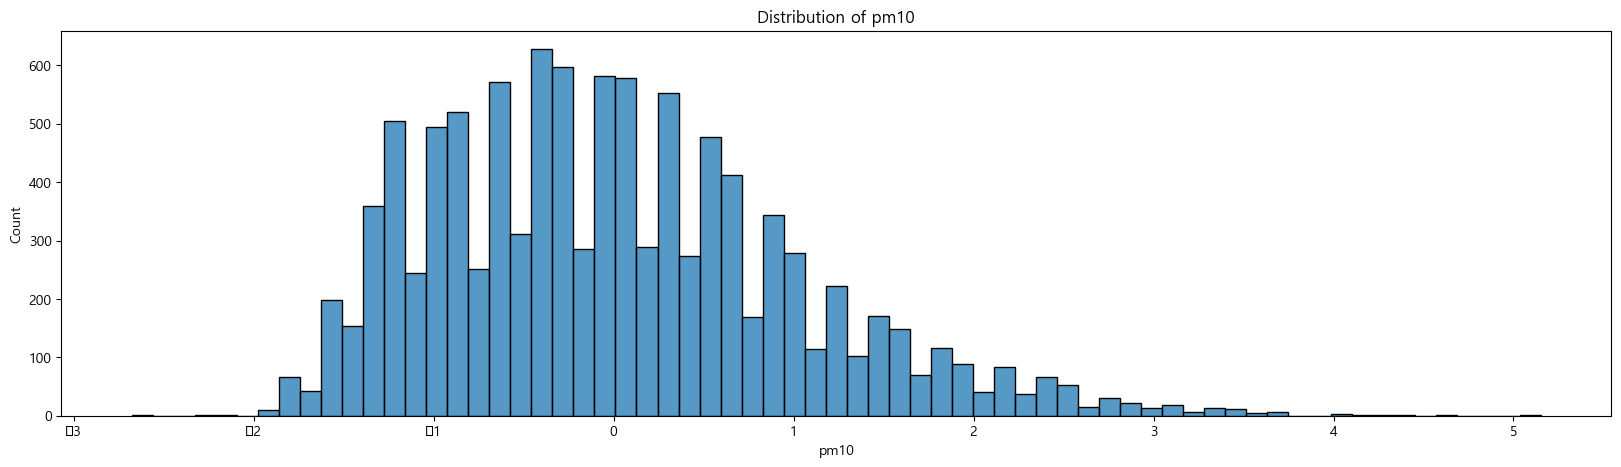

C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


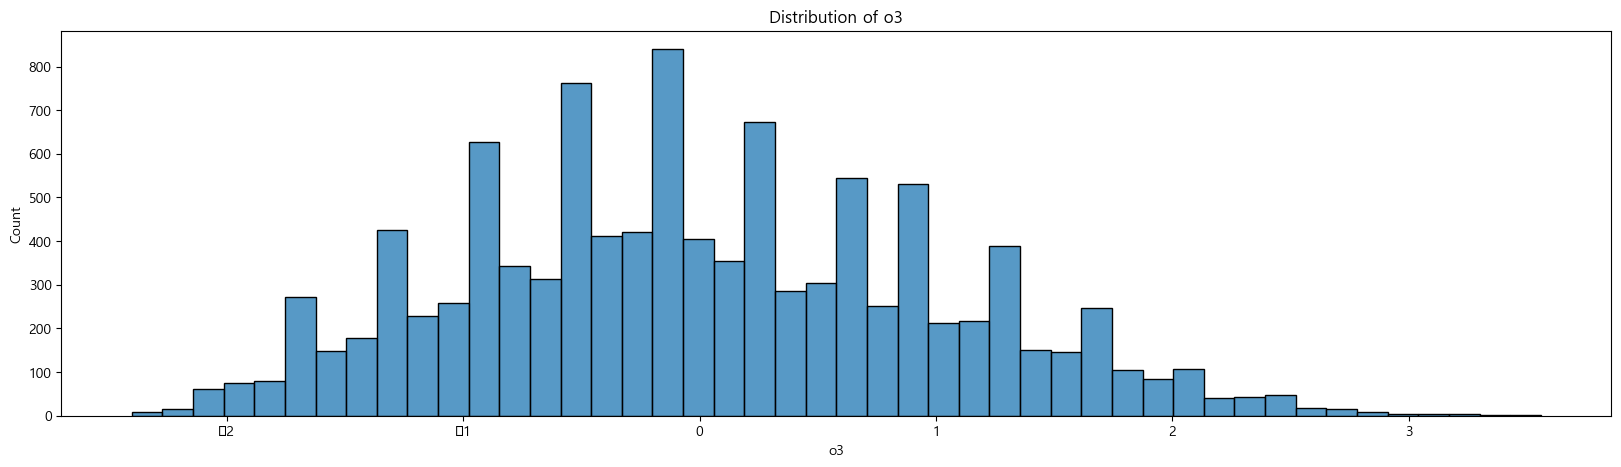

C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


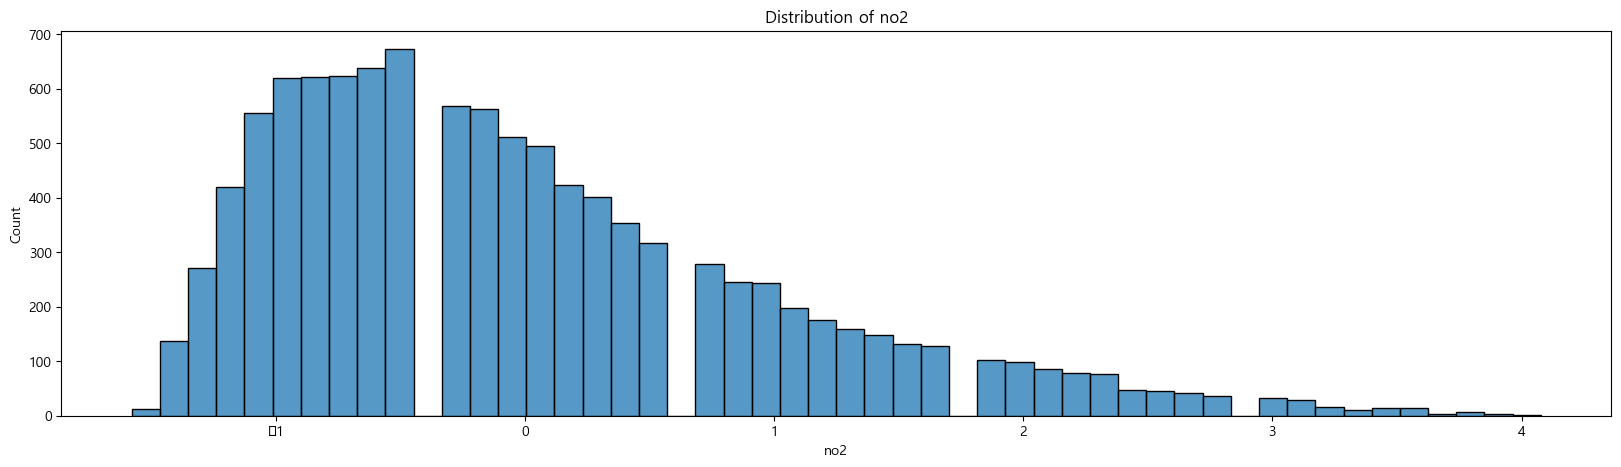

C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


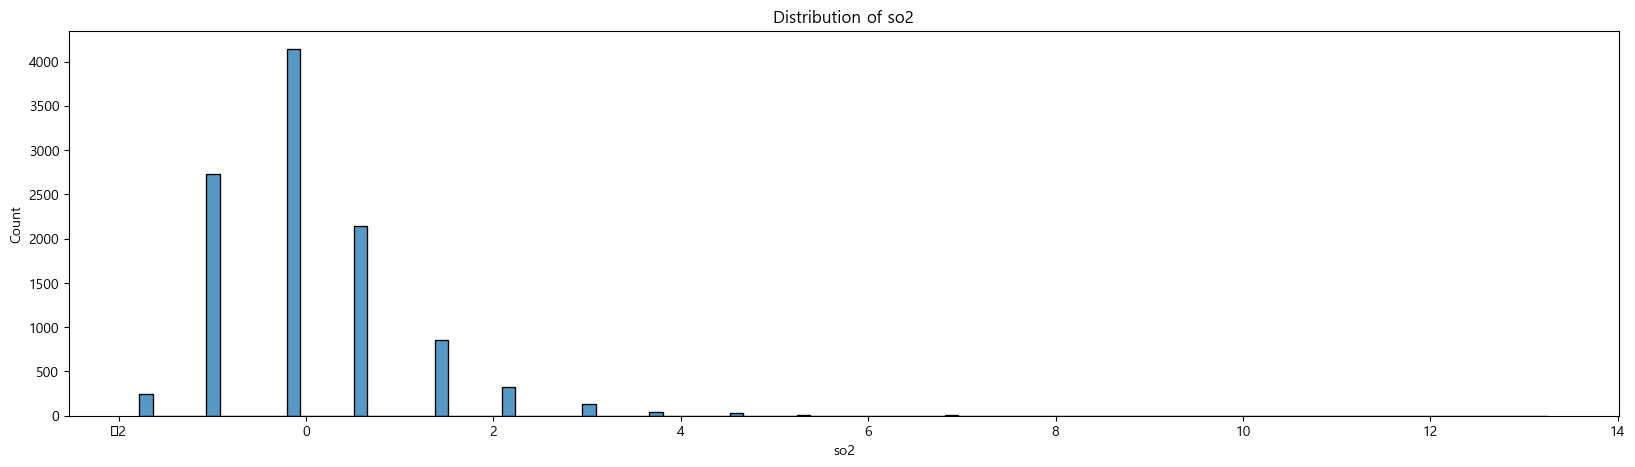

C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


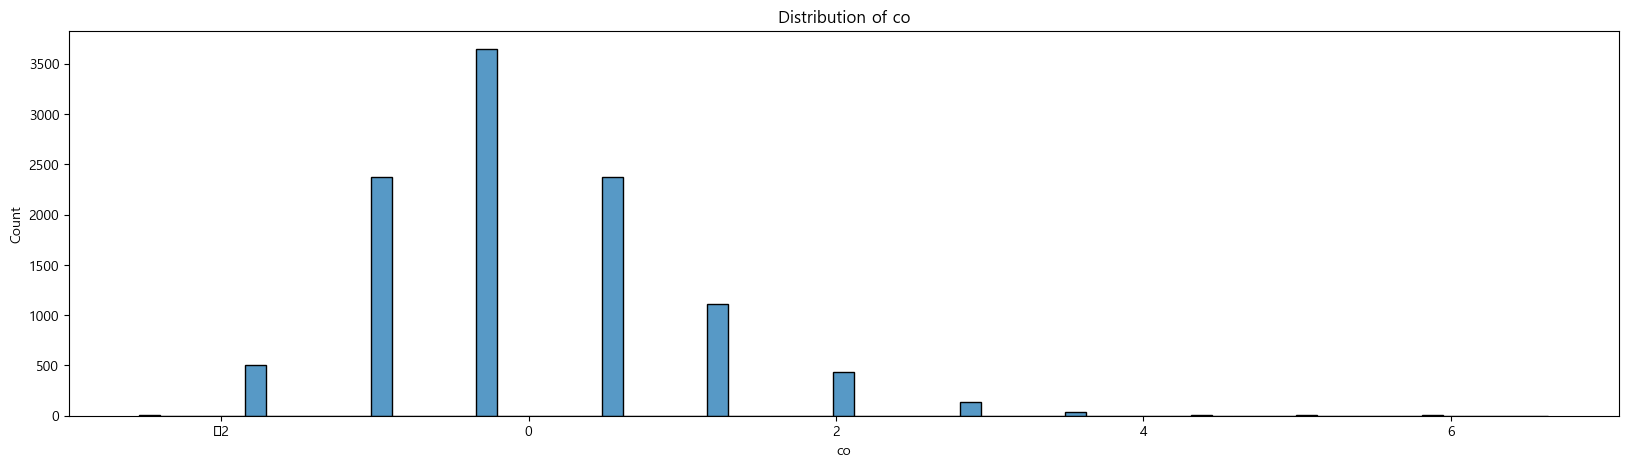

C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


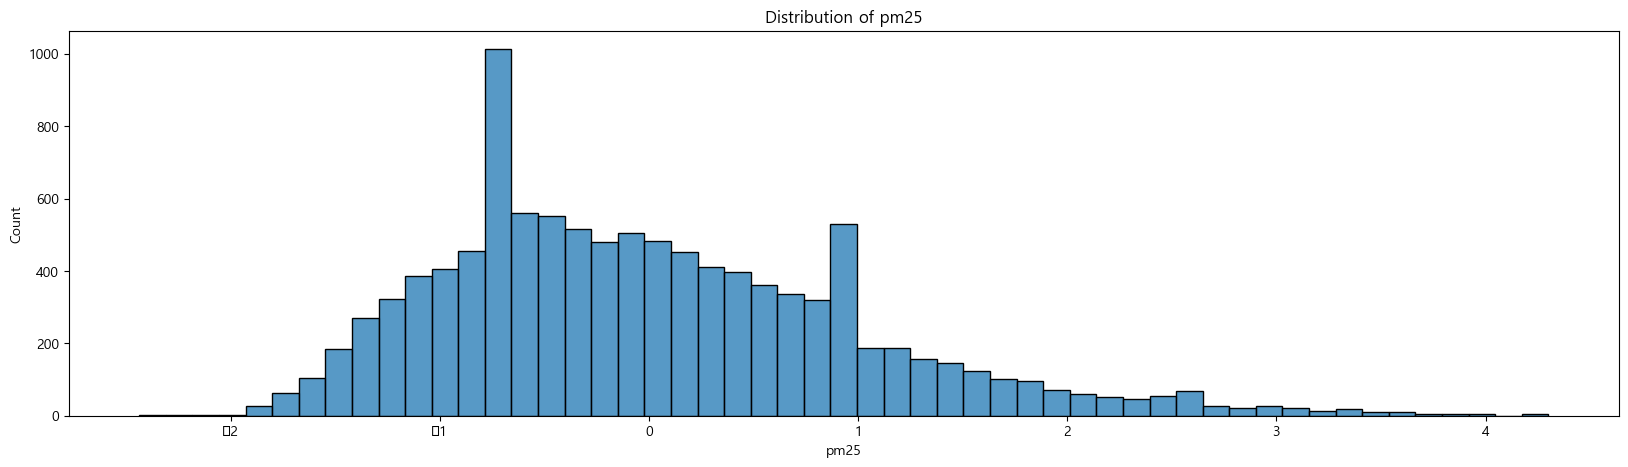

C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


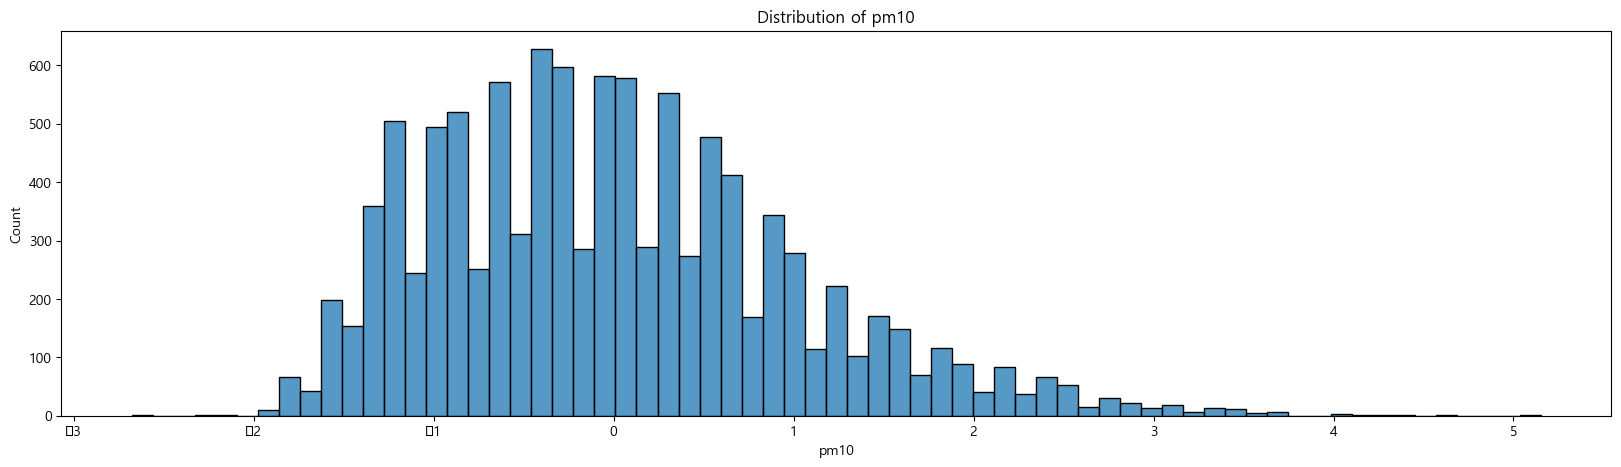

C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


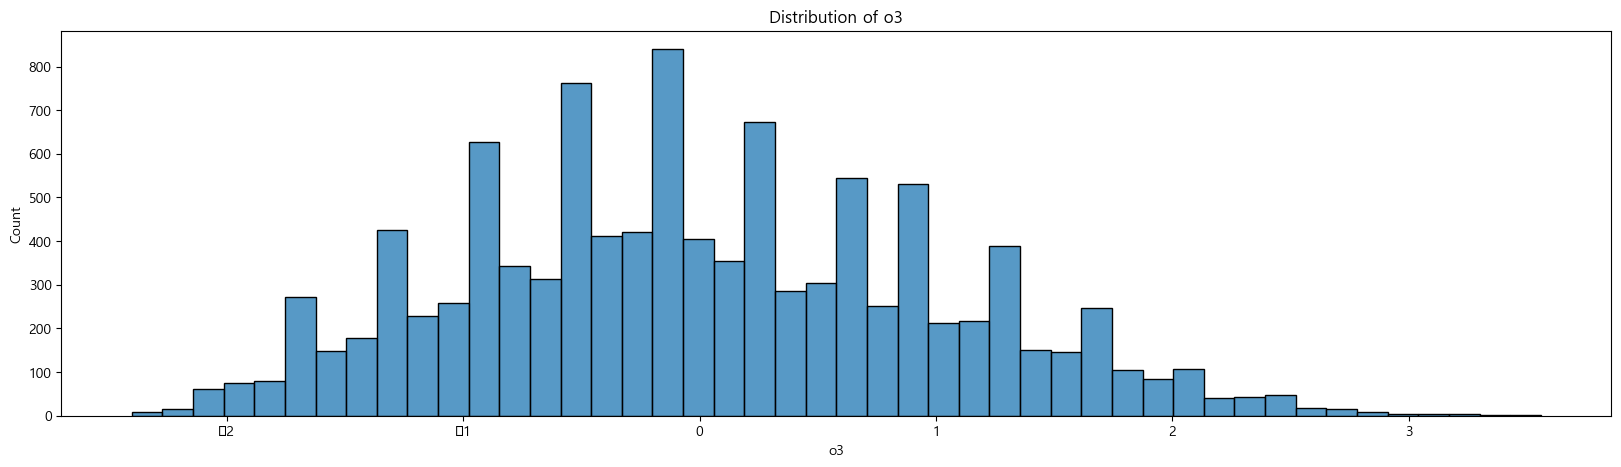

C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


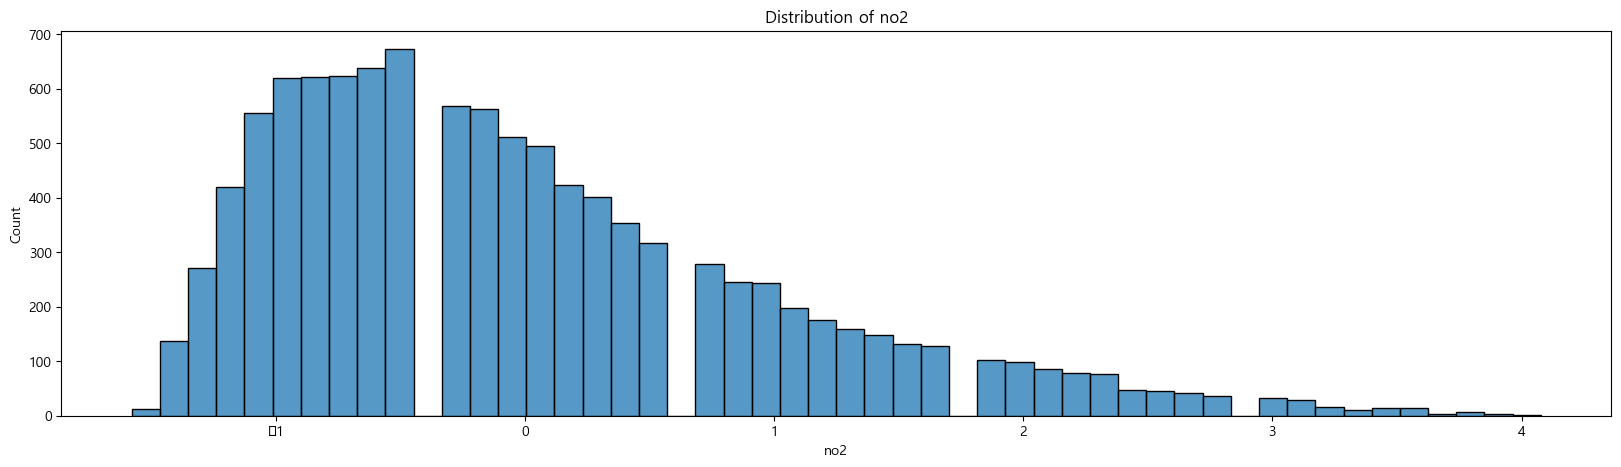

C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


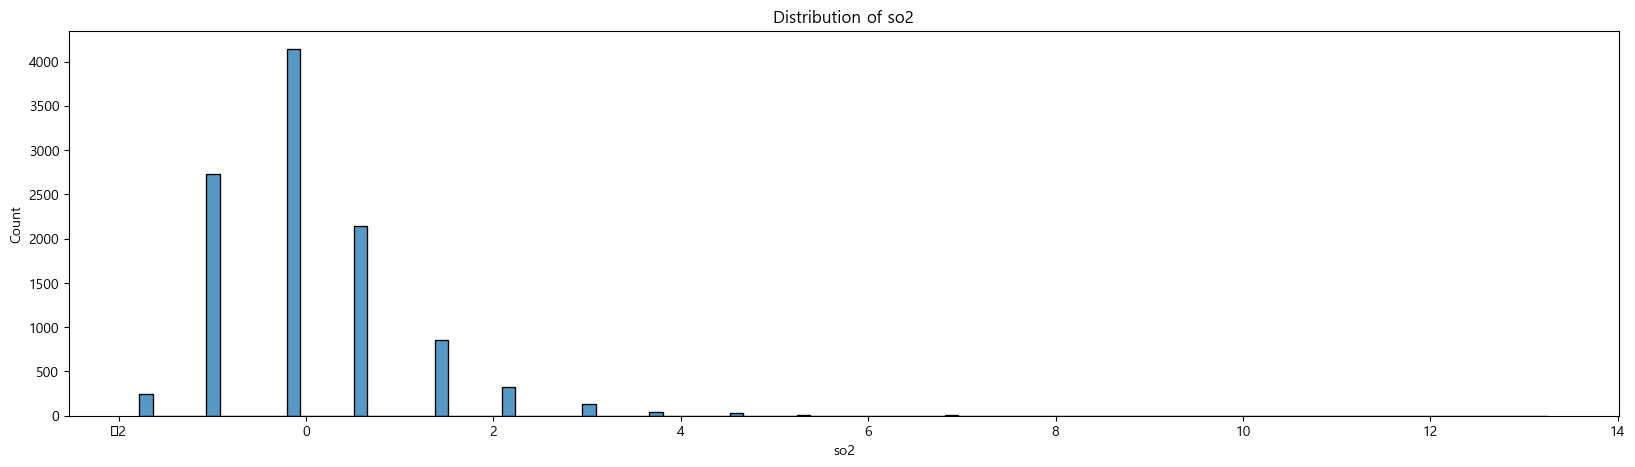

C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


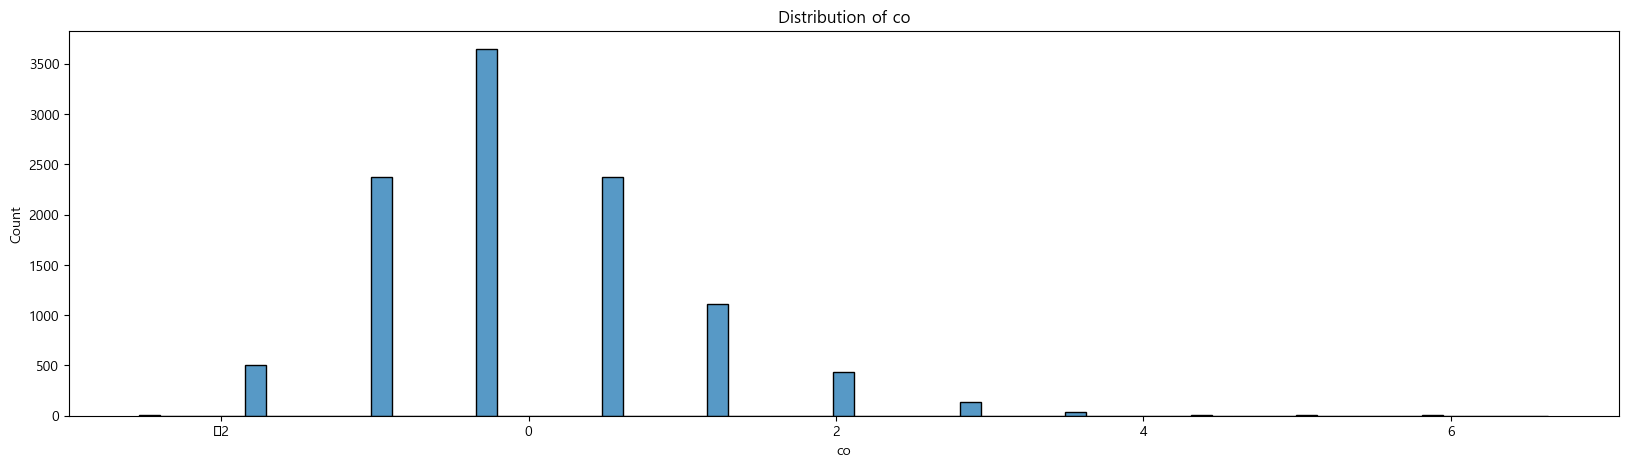

In [117]:
########## Simple Data Exploration 3: Plot-3 ##########
# showing the distribution of pollutants
for pollutant in pollutants:
    plt.figure(figsize=(20, 5))
    sns.histplot(data_std[pollutant])
    plt.title(f'Distribution of {pollutant}')
    plt.show()

# Drop the rows with pm25 = 0.0
# df = df[df['pm25'] != 0.0]

# showing the distribution of pollutants
for pollutant in pollutants:
    plt.figure(figsize=(20, 5))
    sns.histplot(data_std[pollutant])
    plt.title(f'Distribution of {pollutant}')
    plt.show()



========= PCA Dataframe =========
            PC1       PC2     City
0      2.699214 -0.324348       강릉
1      3.031401  1.080133       강릉
2      2.649169  1.412074       강릉
3      0.338993  1.194817       강릉
4     -0.117095  1.734976       강릉
5     -0.692259  1.038448       강릉
6     -1.240376 -0.418826       강릉
7     -1.065919  0.309272       강릉
8     -1.166355 -0.793198       강릉
9     -0.204642  0.188425       강릉
10     0.292640 -0.813647       강릉
11     1.867908 -0.388867       강릉
12     1.497039 -0.135974       강릉
13     2.541967  0.141901       강릉
14     2.450938  1.520043       강릉
15     1.141526  2.059978       강릉
16     0.490373  2.104809       강릉
17    -0.245583  1.105050       강릉
18    -0.854821 -0.369472       강릉
19    -1.423066 -0.456637       강릉
20    -0.319853 -0.420481       강릉
21     0.726079 -0.453299       강릉
22     2.394131 -0.241682       강릉
23     1.647876 -0.432607       강릉
24     2.161768 -0.845379       강릉
25     1.277637  0.739010       강릉
26     2.219054  0.1

C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


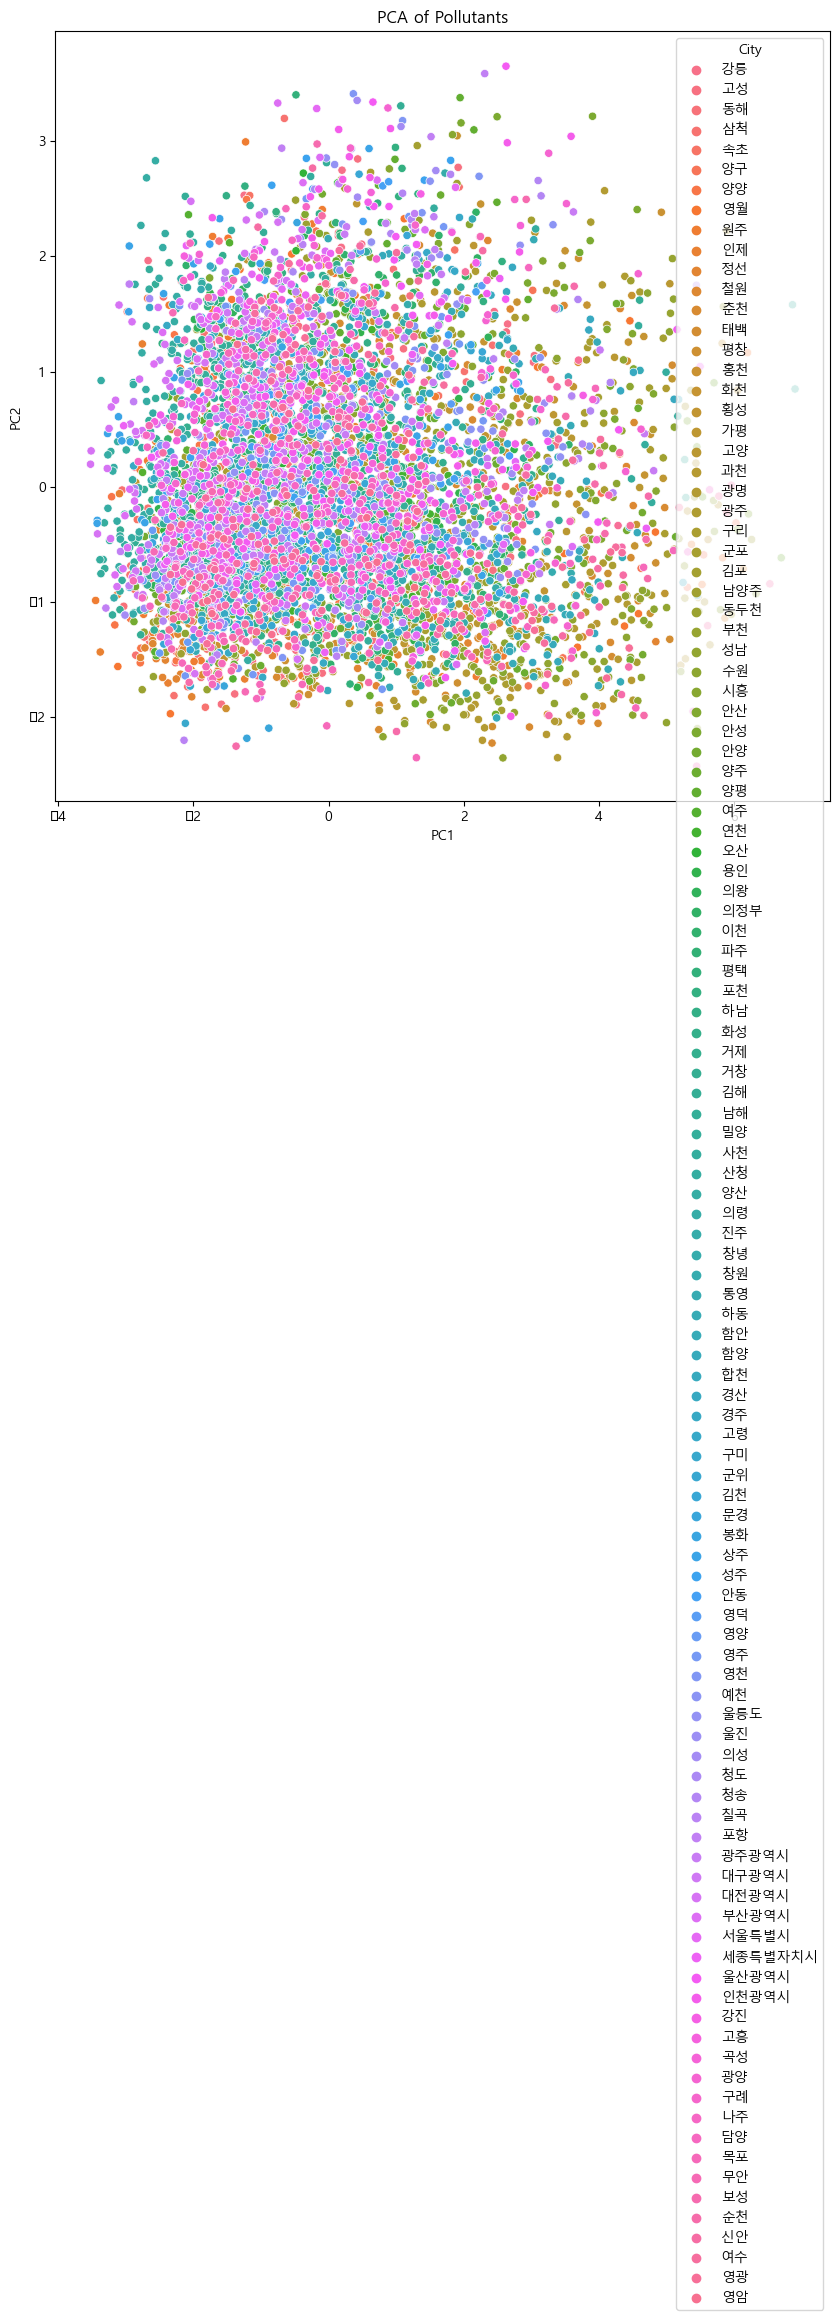

In [118]:
########## Data Feature Engineering 1: Perform PCA with 2 components ##########
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_std[pollutants])
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['City'] = df['City']
pm_df = df[['pm25', 'pm10', 'City']]


# Print the principal components 
print("\n========= PCA Dataframe =========")
print(principal_df)

# Plot the principal components
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', hue='City', data=principal_df)
plt.title('PCA of Pollutants')
plt.show()

# # Plot the pm_df (pm25, pm10)
# plt.figure(figsize=(10, 10))
# sns.scatterplot(x='pm25', y='pm10', hue='City', data=pm_df)
# plt.title('pm25 vs pm10')
# plt.show()




========= PCA Dataframe =========
              PC1       PC2
City                       
가평       0.404686  0.033472
강릉      -0.547537  0.219811
강진       0.539193  0.072083
거제      -0.667604  0.042346
거창       0.366231  0.057820
경산       1.995986 -0.055538
경주      -1.658544  0.012045
고령       1.014373  0.469978
고성       0.190336 -0.000466
고양       1.835597 -0.250762
고흥      -0.414659  0.461859
곡성      -0.133807  0.495373
과천       1.288081 -0.770324
광명       1.365054 -0.618222
광양       0.938113  0.219136
광주       1.680554  0.003656
광주광역시    0.164852  0.203830
구례      -0.170425  0.340832
구리       1.053509 -0.045887
구미      -0.849951 -0.418389
군위      -0.431908 -0.400442
군포       1.567552 -0.425688
김천      -0.211999 -0.003896
김포       0.231917  0.101734
김해      -0.736558  0.055058
나주      -0.177279  0.248107
남양주      0.422136 -0.241885
남해      -0.612592  0.219283
담양      -0.372271  0.042302
대구광역시   -1.043746 -0.087916
대전광역시   -1.805273  0.602471
동두천     -0.111282  0.097964
동해      -0.68

C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


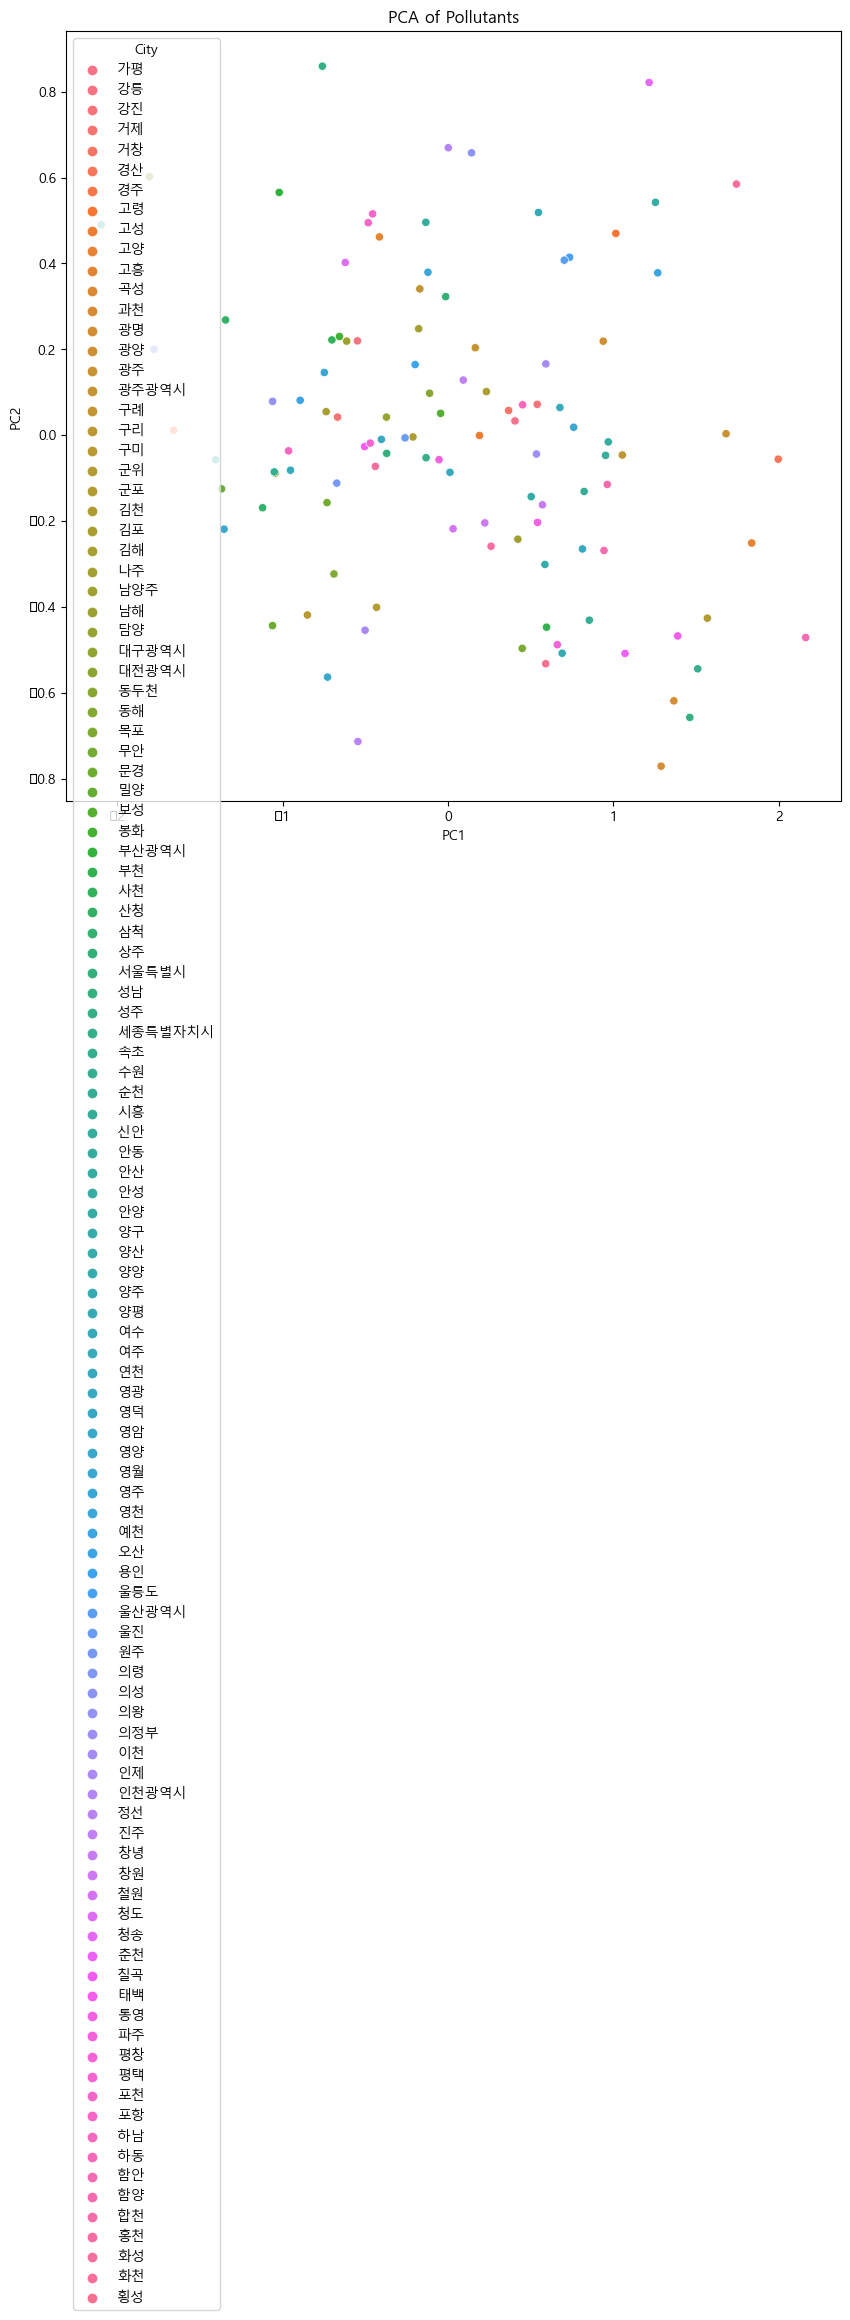

In [119]:
# combine the principal_components values by City
principal_df = principal_df.groupby('City').mean()
print("\n========= PCA Dataframe =========")
print(principal_df)

# group the pm_df by City
pm_df = pm_df.groupby('City').mean()

# Plot the principal_components
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', hue='City', data=principal_df)
plt.title('PCA of Pollutants')
plt.show()

# #Plot the pm_df (pm25, pm10)
# plt.figure(figsize=(10, 10))
# sns.scatterplot(x='pm25', y='pm10', hue='City', data=pm_df)
# plt.title('pm25 vs pm10')
# plt.show()

C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


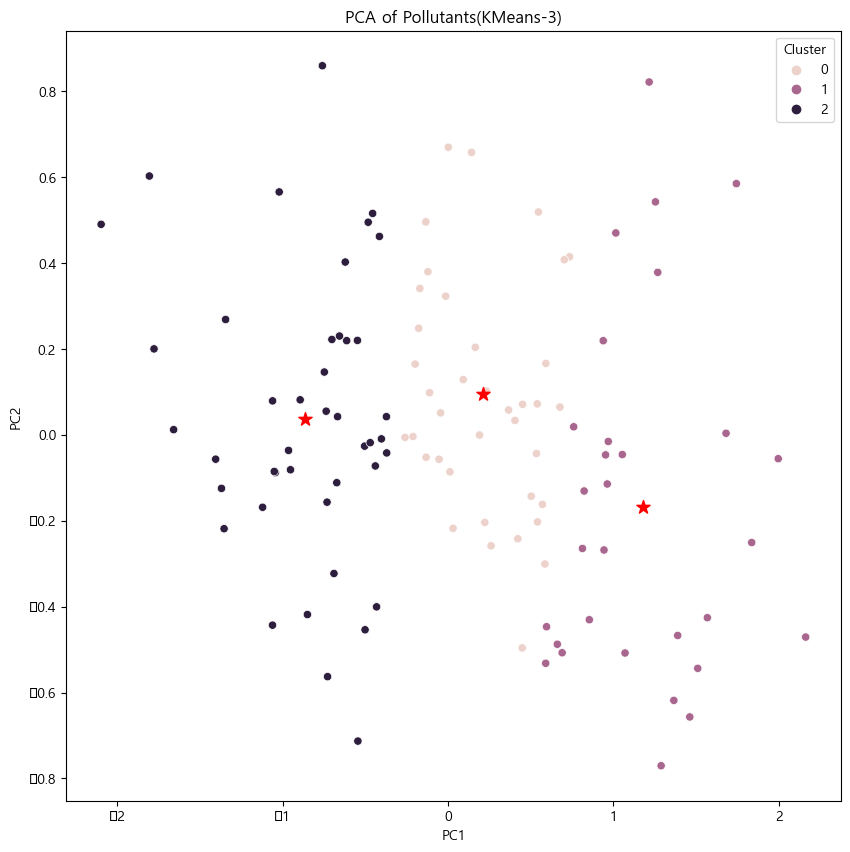


========= City and Cluster =========
              PC1       PC2  Cluster
City                                
가평       0.404686  0.033472        0
강릉      -0.547537  0.219811        2
강진       0.539193  0.072083        0
거제      -0.667604  0.042346        2
거창       0.366231  0.057820        0
경산       1.995986 -0.055538        1
경주      -1.658544  0.012045        2
고령       1.014373  0.469978        1
고성       0.190336 -0.000466        0
고양       1.835597 -0.250762        1
고흥      -0.414659  0.461859        2
곡성      -0.133807  0.495373        0
과천       1.288081 -0.770324        1
광명       1.365054 -0.618222        1
광양       0.938113  0.219136        1
광주       1.680554  0.003656        1
광주광역시    0.164852  0.203830        0
구례      -0.170425  0.340832        0
구리       1.053509 -0.045887        1
구미      -0.849951 -0.418389        2
군위      -0.431908 -0.400442        2
군포       1.567552 -0.425688        1
김천      -0.211999 -0.003896        0
김포       0.231917  0.101734        0


In [120]:
# clustering with KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(principal_df)
principal_df['Cluster'] = kmeans.labels_

# Plot the principal_df
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=principal_df)
plt.title('PCA of Pollutants(KMeans-3)')
# draw centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, marker='*',c='red', label='Centroids')
plt.show()

# print City and Cluster
print("\n========= City and Cluster =========")
print(principal_df)

# print the number of cities in each cluster
print("\n========= Number of cities in each cluster =========")
print(principal_df['Cluster'].value_counts())

# print the mean of pollutants in each cluster
print("\n========= Mean of pollutants in each cluster =========")
print(principal_df.groupby('Cluster').mean())

# print list of cities in each cluster
print("\n========= List of cities in each cluster =========")
for cluster in principal_df['Cluster'].unique():
    print(f'\nCluster {cluster}:')
    print(principal_df[principal_df['Cluster'] == cluster].index.values)



C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


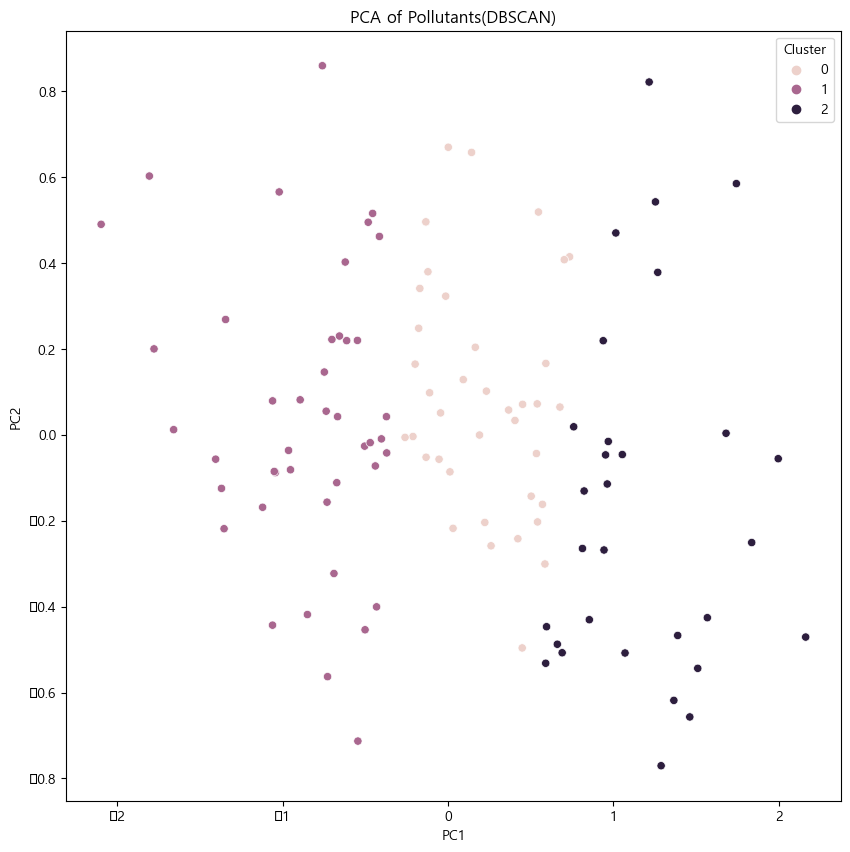


========= List of cities in each cluster =========

Cluster 0:
['가평' '강진' '거창' '고성' '곡성' '광주광역시' '구례' '김천' '김포' '나주' '남양주' '동두천' '목포'
 '보성' '상주' '세종특별자치시' '안동' '안양' '양구' '양평' '여수' '연천' '영천' '용인' '울릉도' '울산광역시'
 '울진' '의성' '의정부' '이천' '인천광역시' '진주' '창녕' '창원' '철원' '통영' '파주' '하동' '홍천']

Cluster 1:
['강릉' '거제' '경주' '고흥' '구미' '군위' '김해' '남해' '담양' '대구광역시' '대전광역시' '동해' '무안'
 '문경' '밀양' '봉화' '부산광역시' '사천' '산청' '삼척' '서울특별시' '성주' '속초' '양산' '양양' '여주'
 '영덕' '영암' '영양' '영주' '오산' '원주' '의령' '의왕' '인제' '정선' '청도' '칠곡' '평택' '포천'
 '포항' '하남' '화성']

Cluster 2:
['경산' '고령' '고양' '과천' '광명' '광양' '광주' '구리' '군포' '부천' '성남' '수원' '순천' '시흥'
 '신안' '안산' '안성' '양주' '영광' '영월' '예천' '청송' '춘천' '태백' '평창' '함안' '함양' '합천'
 '화천' '횡성']


In [121]:
# Run the DBSCAN algorithm
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.35, min_samples=6)
dbscan.fit(principal_df)
# initialize and fit the DBSCAN model
principal_df['Cluster'] = dbscan.labels_

# Plot the principal_df
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=principal_df)
# color outliers black
plt.scatter(principal_df[principal_df['Cluster'] == -1]['PC1'], principal_df[principal_df['Cluster'] == -1]['PC2'], s=50,marker='^', c='black', label='Outliers')
plt.title('PCA of Pollutants(DBSCAN)')
plt.show()

# print list of cities in each cluster
print("\n========= List of cities in each cluster =========")
for cluster in principal_df['Cluster'].unique():
    print(f'\nCluster {cluster}:')
    print(principal_df[principal_df['Cluster'] == cluster].index.values)



Cluster 0:
이 클러스터의 도시들은 주로 수도권과 지방 도시로 구성되어 있습니다. 이 지역은 산업 밀집지역이 많아 공장 및 산업 활동으로 인한 대기 오염이 발생할 수 있습니다. 또한 도시화로 인한 토지 이용 변화와 인구 증가로 인해 폐기물 처리 문제가 발생할 수 있습니다.

Cluster 1:
이 클러스터의 도시들은 동해안과 서울 근처 지역에 위치하고 있습니다. 해안 도시들은 해양 오염에 노출되는 위험이 있을 수 있으며, 서울과 같은 주요 도시들은 교통량과 산업 활동으로 인한 대기 오염이 주요 문제일 수 있습니다.

Cluster 3:
이 클러스터의 도시들은 남부 지방과 산악 지역에 위치하고 있습니다. 이 지역은 자연 환경이 풍부하며 농업 활동이 활발합니다. 따라서 농약 사용이나 농업 폐기물 처리 등과 같은 농업 환경 오염이 주요 관심사일 수 있습니다.

Cluster 2:
이 클러스터의 도시들은 수도권 지역에 위치하고 있습니다. 수도권은 인구 밀도가 높고 교통량이 많아 대기 오염과 수질 오염 등의 환경 오염 문제가 주요 관심사일 수 있습니다.

C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

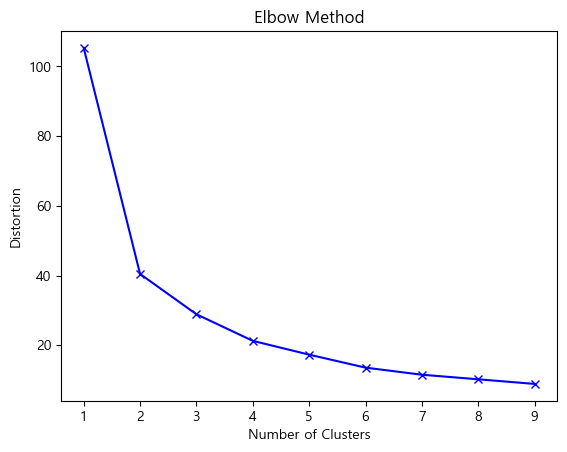

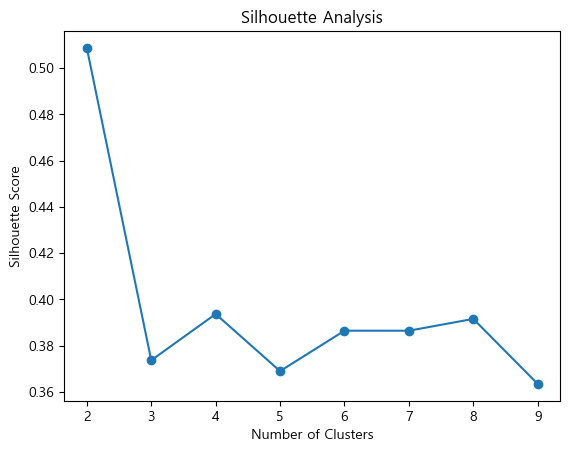

C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


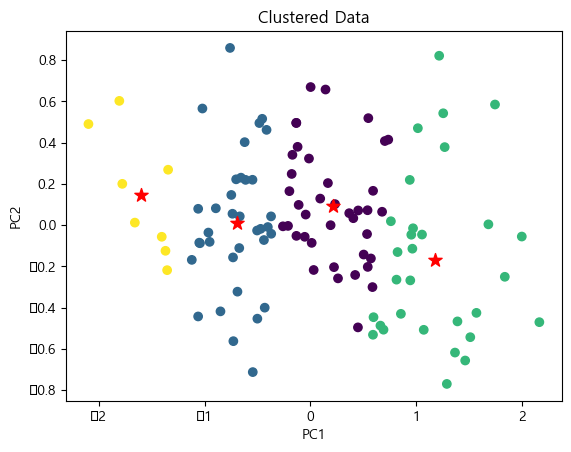

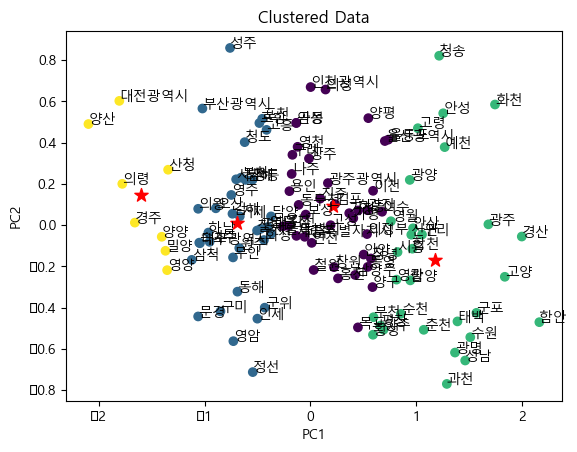


========= List of cities in each cluster =========

Cluster 0:
['가평' '강진' '거창' '고성' '곡성' '광주광역시' '구례' '김천' '김포' '나주' '남양주' '동두천' '목포'
 '보성' '상주' '세종특별자치시' '안동' '안양' '양구' '양평' '여수' '연천' '영천' '용인' '울릉도' '울산광역시'
 '울진' '의성' '의정부' '이천' '인천광역시' '진주' '창녕' '창원' '철원' '통영' '파주' '하동' '홍천']

Cluster 1:
['강릉' '거제' '고흥' '구미' '군위' '김해' '남해' '담양' '대구광역시' '동해' '무안' '문경' '봉화'
 '부산광역시' '사천' '삼척' '서울특별시' '성주' '속초' '여주' '영덕' '영암' '영주' '오산' '원주' '의왕'
 '인제' '정선' '청도' '칠곡' '평택' '포천' '포항' '하남' '화성']

Cluster 2:
['경산' '고령' '고양' '과천' '광명' '광양' '광주' '구리' '군포' '부천' '성남' '수원' '순천' '시흥'
 '신안' '안산' '안성' '양주' '영광' '영월' '예천' '청송' '춘천' '태백' '평창' '함안' '함양' '합천'
 '화천' '횡성']

Cluster 3:
['경주' '대전광역시' '밀양' '산청' '양산' '양양' '영양' '의령']


In [122]:


from sklearn.metrics import silhouette_score
# Use the elbow method to determine the optimal number of clusters
distortions = []
silhouette_scores = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(principal_df[['PC1', 'PC2']])
    distortions.append(kmeans.inertia_)

# Use silhouette score to determine the optimal number of clusters
J = range(2, 10)
for j in J:
    kmeans2 = KMeans(n_clusters=j)
    kmeans2.fit(principal_df[['PC1', 'PC2']])
    silhouette_scores.append(silhouette_score(principal_df[['PC1', 'PC2']], kmeans2.labels_))



# Determine the optimal number of clusters using the elbow method
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

# 실루엣 스코어를 그립니다.
plt.plot(J, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()



# Choose the optimal number of clusters
optimal_cluster_num = 4 # 사용자가 직접 선택



# Perform K-means clustering with the optimal number of clusters
kmeans3 = KMeans(n_clusters=optimal_cluster_num)
kmeans3.fit(principal_df)
labels = kmeans3.labels_

# append the cluster labels to the principal_df
principal_df['Cluster'] = labels

# Visualize the clustered data
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=labels)
plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], s=100, marker='*',c='red', label='Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustered Data')
plt.show()

# Visualize the clustered data with labels
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=labels)
plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], s=100, marker='*',c='red', label='Centroids')
# label the data points
for i, txt in enumerate(principal_df.index.values):
    plt.annotate(txt, (principal_df['PC1'][i], principal_df['PC2'][i]))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustered Data')
plt.show()


# print list of cities in each cluster
print("\n========= List of cities in each cluster =========")
for cluster in principal_df['Cluster'].unique():
    print(f'\nCluster {cluster}:')
    print(principal_df[principal_df['Cluster'] == cluster].index.values)





Cluster 3:

이 클러스터에는 광주광역시, 인천광역시, 울산광역시 등 대도시들이 포함되어 있습니다. 이들 도시들은 산업 및 상업 중심지로서, 산업 활동과 인구 밀도가 높습니다. 따라서 공통적으로 대기 중의 산업 배출물 및 차량 배출 가스 등이 오염 요인으로 작용할 수 있습니다.
Cluster 2:

이 클러스터에는 서울특별시, 대구광역시, 부산광역시 등 대도시들이 포함되어 있습니다. 이들 도시들은 인구 밀도가 높고 교통량이 많은 특징을 가지며, 산업 및 상업 활동이 활발합니다. 따라서 차량 배출 가스, 산업 배출물, 대기 중 입자물질 등이 주요한 오염 요인으로 작용할 수 있습니다.
Cluster 1:

이 클러스터에는 경산, 고양, 광주, 성남, 수원 등 도시들이 포함되어 있습니다. 이들 도시들은 인접한 도심 지역이나 도시 근교에 위치하며, 인구 밀도가 높습니다. 따라서 교통량, 도심 지역의 산업 및 상업 활동으로 인한 대기 오염이 공통적인 요인일 수 있습니다.
Cluster 5:

이 클러스터에는 대전광역시, 부산광역시, 경주 등 도시들이 포함되어 있습니다. 이들 도시들은 상대적으로 자연 환경이 풍부한 특징을 가지며, 주변에 산악 지역이 많습니다. 따라서 자연적인 요인으로 인한 오염, 예를 들어 산불, 자연 발생 미세먼지 등이 공통적인 요인일 수 있습니다.
Cluster 4:

이 클러스터에는 광양, 순천, 안산, 춘천 등 도시들이 포함되어 있습니다. 이들 도시들은 산업 및 농업 활동이 활발한 특징을 가지고 있습니다. 따라서 산업 배출물, 농약 사용, 가축 사육 등이 주요한 오염 요인으로 작용할 수 있습니다.
Cluster 0:

이 클러스터에는 광명, 성남, 수원 등 도시들이 포함되어 있습니다. 이들 도시들은 수도권 지역에 위치하며, 인구 밀도가 높고 산업 및 상업 활동이 활발합니다. 따라서 도심 지역의 산업 배출물, 교통량 등이 오염 요인으로 작용할 수 있습니다.